In [1]:
%run ../../../../../../recidiviz-research/utils/research_utils.py

/Users/justine/recidiviz-research/utils/research_utils.py:37: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipython.magic("load_ext google.cloud.bigquery")
/Users/justine/recidiviz-research/utils/research_utils.py:38: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipython.magic("load_ext autoreload")
/Users/justine/recidiviz-research/utils/research_utils.py:39: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipython.magic("autoreload 2")  # 2 => reload ALL modules on every code run


In [2]:
adjust_plot_scale(0.4)

In [9]:
ok_cleaned_data = pd.read_csv(
    "/Users/justine/Downloads/OK_SB1646 Data with Proposed Changes - cleaned_data.csv"
)
ok_cleaned_data["sent_date"] = pd.to_datetime(ok_cleaned_data["sent_date"])
print(len(ok_cleaned_data))
print(ok_cleaned_data["doc_num"].nunique())
ok_cleaned_data.head()

11794
5720


,statute,class,sent_date,doc_num,prison_term,exclude_85,former_min,former_max,point_in_range,new_min_a,new_min_b,new_min_c,new_max,estimated_new_sent,violent,violent_priors,nonviolent_priors,prior_mod,avg_gt_max
0,21.1021.B1,A1,2019-11-26,404412,20.0,NaN,10.0,30.0,0.50,NaN,NaN,NaN,NaN,20.0,False,7,1,C,False
1,21.1021.B1,A1,2018-12-17,825615,5.0,NaN,10.0,30.0,-0.25,NaN,NaN,NaN,NaN,5.0,False,0,0,A,False
2,21.1021.B1,A1,2018-12-17,825615,5.0,NaN,10.0,30.0,-0.25,NaN,NaN,NaN,NaN,5.0,False,0,0,A,False
3,21.1021.B1,A1,2020-06-15,858651,6.0,NaN,10.0,30.0,-0.20,NaN,NaN,NaN,NaN,6.0,False,0,0,A,False
4,21.1021.B1,A1,2019-03-26,835825,5.0,NaN,10.0,30.0,-0.25,NaN,NaN,NaN,NaN,5.0,False,0,0,A,False


In [6]:
ok_cleaned_data[ok_cleaned_data["statute"].str.contains("21.650")]

,statute,class,sent_date,doc_num,prison_term,exclude_85,former_min,former_max,point_in_range,new_min_a,new_min_b,new_min_c,new_max,estimated_new_sent,violent,violent_priors,nonviolent_priors,prior_mod,avg_gt_max
5430,21.650.9,B5,2019-07-25,210749,7.0,NaN,0.0,2.0,3.50,0.0,0.0,0.0,5.0,5.0,False,5,13,C,True
5433,21.650.9,B5,2019-05-29,759811,2.0,NaN,0.0,2.0,1.00,0.0,0.0,0.0,5.0,5.0,False,0,1,B,True
5435,21.650.9,B5,2018-10-03,543393,2.0,NaN,0.0,2.0,1.00,0.0,0.0,0.0,5.0,5.0,False,1,12,C,True
5436,21.650.9,B5,2020-03-27,668864,5.0,NaN,0.0,2.0,2.50,0.0,0.0,0.0,5.0,5.0,False,2,3,C,True
5437,21.650.9,B5,2019-07-25,210749,7.0,NaN,0.0,2.0,3.50,0.0,0.0,0.0,5.0,5.0,False,5,13,C,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,21.650.9,B6,2020-08-31,503800,10.0,NaN,0.0,2.0,5.00,0.0,0.0,0.0,2.0,2.0,False,0,9,C,True
8142,21.650.9,B6,2019-07-23,860318,1.5,NaN,0.0,2.0,0.75,0.0,0.0,0.0,2.0,1.5,False,0,0,A,True
8143,21.650.4,B6,2020-03-12,451997,5.0,NaN,0.0,2.0,2.50,0.0,0.0,0.0,2.0,2.0,True,0,5,C,False
8144,21.650.9,B6,2019-04-22,621286,2.0,NaN,0.0,2.0,1.00,0.0,0.0,0.0,2.0,2.0,False,1,1,C,True


<AxesSubplot:>

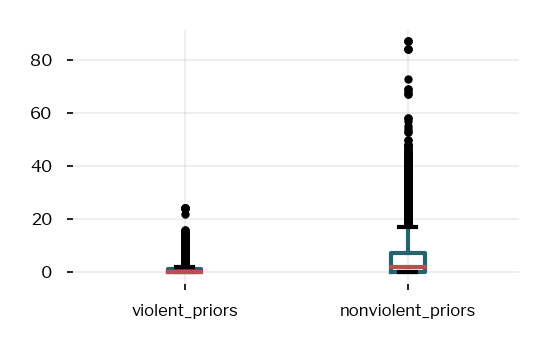

In [12]:
flierprops = dict(markersize=1)
ok_cleaned_data[["violent_priors", "nonviolent_priors"]].boxplot(flierprops=flierprops)

In [18]:
def count_people(person_charges):
    if max(person_charges["class"])[0] == "A":
        return False
    elif max(person_charges["violent_priors"]) >= 3:
        return True
    elif max(person_charges["nonviolent_priors"]) >= 5:
        return True
    else:
        return False


enhancement_eligible = ok_cleaned_data.groupby("doc_num").apply(count_people)
enhancement_eligible.value_counts(dropna=False)

False    3194
True     2526
dtype: int64

In [19]:
ok_cleaned_data.tail()

,statute,class,sent_date,doc_num,prison_term,exclude_85,former_min,former_max,point_in_range,new_min_a,new_min_b,new_min_c,new_max,estimated_new_sent,violent,violent_priors,nonviolent_priors,prior_mod,avg_gt_max
11789,21.1715,D3,2021-08-09,859000,5.0,NaN,0.0,2.0,2.500000,0.0,0.0,0.0,2.0,2.000000,False,0,2,C,True
11790,21.1442,D3,2019-01-29,154646,9.0,NaN,0.0,2.0,4.500000,0.0,0.0,0.0,2.0,2.000000,False,0,48,C,True
11791,21.1662,D3,2018-11-08,654534,3.0,NaN,0.0,3.0,1.000000,0.0,0.0,0.0,2.0,2.000000,False,1,3,C,True
11792,21.1442,D3,2021-02-03,506194,2.0,NaN,0.0,2.0,1.000000,0.0,0.0,0.0,2.0,2.000000,False,0,4,C,True
11793,21.1662,D3,2019-04-15,709927,2.0,NaN,0.0,3.0,0.666667,0.0,0.0,0.0,2.0,1.333333,False,0,4,C,True


In [20]:
ok_cleaned_data[ok_cleaned_data["doc_num"] == 154646]

,statute,class,sent_date,doc_num,prison_term,exclude_85,former_min,former_max,point_in_range,new_min_a,new_min_b,new_min_c,new_max,estimated_new_sent,violent,violent_priors,nonviolent_priors,prior_mod,avg_gt_max
11144,21.1727,D1,2019-01-29,154646,9.0,NaN,1.0,5.0,2.0,0.0,0.0,0.0,5.0,5.0,False,0,48,C,True
11154,21.1727,D1,2019-01-29,154646,9.0,NaN,1.0,5.0,2.0,0.0,0.0,0.0,5.0,5.0,False,0,48,C,True
11790,21.1442,D3,2019-01-29,154646,9.0,NaN,0.0,2.0,4.5,0.0,0.0,0.0,2.0,2.0,False,0,48,C,True


In [21]:
ok_cleaned_data["estimated_new_sent"].value_counts(dropna=False)

5.000000     3397
2.000000     1729
10.000000    1599
7.000000      865
3.000000      743
             ... 
0.155000        1
0.605000        1
0.205000        1
2.690000        1
0.346667        1
Name: estimated_new_sent, Length: 394, dtype: int64

<AxesSubplot:xlabel='sent_date,sent_date'>

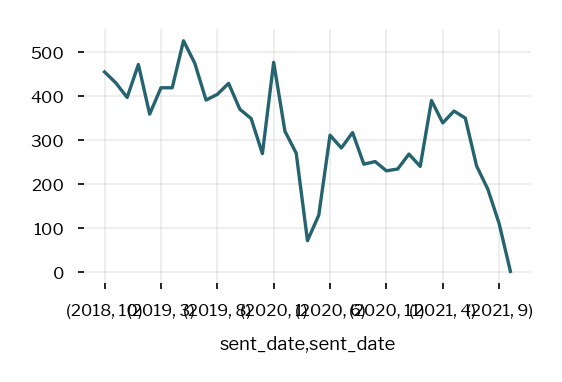

In [26]:
ok_cleaned_data.groupby(
    [ok_cleaned_data.sent_date.dt.year, ok_cleaned_data.sent_date.dt.month]
)["doc_num"].count().plot()